In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [46]:
print('GPU',tf.test.is_gpu_available())

GPU False


In [47]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [48]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [49]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-3.7409008e-02, -8.7402761e-05, -1.4451219e-02, -8.1768349e-02,
         8.3212483e-01, -1.7101705e-02,  1.9767372e-01, -8.8239634e-01,
        -3.0277431e-02, -2.7830869e-01]], dtype=float32)

In [50]:
tf.nn.softmax(predictions).numpy()

array([[0.09164368, 0.0951286 , 0.09377196, 0.08766728, 0.21864335,
        0.09352374, 0.11593048, 0.03936671, 0.09229959, 0.07202464]],
      dtype=float32)

In [51]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [52]:
loss_fn(y_train[:1], predictions).numpy()

2.36954

In [53]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [54]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.2979 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 2s 861us/step - loss: 0.1452 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.1089 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 2s 838us/step - loss: 0.0884 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 2s 849us/step - loss: 0.0751 - accuracy: 0.9760


In [55]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0779 - accuracy: 0.9775 - 282ms/epoch - 900us/step


[0.07791567593812943, 0.9775000214576721]

In [56]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [57]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.5736773e-08, 1.3040542e-09, 6.4609571e-06, 5.2803727e-05,
        1.5268904e-12, 7.7921449e-08, 3.1444065e-14, 9.9993765e-01,
        2.8213744e-08, 2.8980407e-06],
       [9.1543023e-10, 3.1893454e-05, 9.9996710e-01, 4.6598095e-07,
        8.5753875e-16, 1.2435316e-07, 2.7538721e-07, 2.3392953e-14,
        1.2658748e-07, 1.4321332e-18],
       [3.2773721e-06, 9.9829513e-01, 2.3143351e-04, 6.3079206e-06,
        1.4031102e-04, 2.5348788e-06, 1.0753650e-04, 1.0869966e-03,
        1.2546060e-04, 1.0998612e-06],
       [9.9942893e-01, 3.8779877e-09, 4.7315148e-04, 7.8874592e-08,
        4.9984973e-08, 2.4418650e-06, 8.2272185e-05, 1.1600572e-05,
        3.1269221e-09, 1.3806080e-06],
       [5.4656287e-08, 1.3335336e-09, 1.0101945e-06, 2.9481073e-09,
        9.9373192e-01, 2.8577361e-07, 1.9946846e-07, 9.3027898e-05,
        8.2331141e-08, 6.1734822e-03]], dtype=float32)>

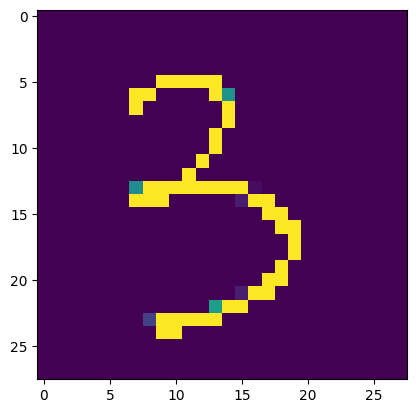

1/1 [==============================] - 0s 28ms/step
3


In [58]:
    def decode_predictions(a):
        return np.argmax(a)
    raw = tf.io.read_file("3.PNG")
    tensor = tf.io.decode_image(raw, channels=1, dtype=tf.dtypes.float32)
    tensor = tf.image.resize(tensor, [28, 28])
    
    d = [[[] for i in range(28)] for j in range (28)]
    for i in range(28):
        for j in range(28):
            d[i][j].append(1-tensor[i][j][0])
            
            
    d = np.array(d)
    #print(tensor.shape)
    inputs_tensor = tf.expand_dims(d, axis=0)
    #print(inputs_tensor.shape)
    plt.imshow(d)
    plt.show()
    preds = model.predict(inputs_tensor)
    print(decode_predictions(preds))

(1, 28, 28, 1)


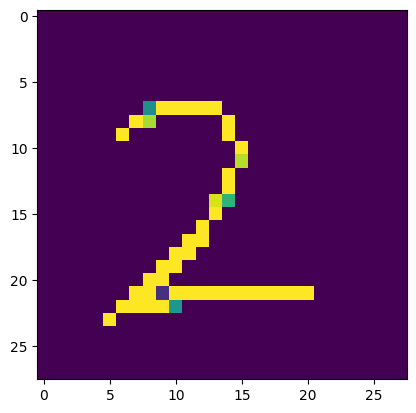

1/1 [==============================] - 0s 13ms/step
2


In [59]:
    def decode_predictions(a):
        return np.argmax(a)
    raw = tf.io.read_file("2.PNG")
    tensor = tf.io.decode_image(raw, channels=1, dtype=tf.dtypes.float32)
    tensor = tf.image.resize(tensor, [28, 28])
    
    d = [[[] for i in range(28)] for j in range (28)]
    for i in range(28):
        for j in range(28):
            d[i][j].append(1-tensor[i][j][0])
            
            
    d = np.array(d)
    #print(tensor.shape)
    inputs_tensor = tf.expand_dims(d, axis=0)
    print(inputs_tensor.shape)
    plt.imshow(d)
    plt.show()
    preds = model.predict(inputs_tensor)
    print(decode_predictions(preds))

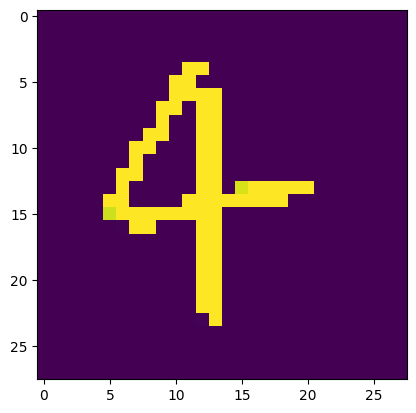

1/1 [==============================] - 0s 12ms/step
4


In [41]:
    def decode_predictions(a):
        return np.argmax(a)
    raw = tf.io.read_file("4.PNG")
    tensor = tf.io.decode_image(raw, channels=1, dtype=tf.dtypes.float32)
    tensor = tf.image.resize(tensor, [28, 28])
    
    d = [[[] for i in range(28)] for j in range (28)]
    for i in range(28):
        for j in range(28):
            d[i][j].append(1-tensor[i][j][0])
            
            
    d = np.array(d)
    #print(tensor.shape)
    inputs_tensor = tf.expand_dims(d, axis=0)
    #print(inputs_tensor.shape)
    plt.imshow(d)
    plt.show()
    preds = model.predict(inputs_tensor)
    print(decode_predictions(preds))

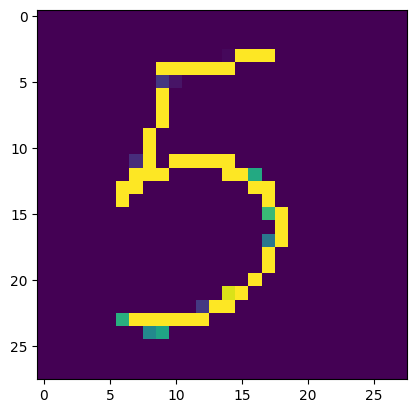

1/1 [==============================] - 0s 13ms/step
5


In [43]:
    def decode_predictions(a):
        return np.argmax(a)
    raw = tf.io.read_file("5.PNG")
    tensor = tf.io.decode_image(raw, channels=1, dtype=tf.dtypes.float32)
    tensor = tf.image.resize(tensor, [28, 28])
    
    d = [[[] for i in range(28)] for j in range (28)]
    for i in range(28):
        for j in range(28):
            d[i][j].append(1-tensor[i][j][0])
            
            
    d = np.array(d)
    #print(tensor.shape)
    inputs_tensor = tf.expand_dims(d, axis=0)
    #print(inputs_tensor.shape)
    plt.imshow(d)
    plt.show()
    preds = model.predict(inputs_tensor)
    print(decode_predictions(preds))